<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

# Problem definition


For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 50)

# Data Gathering

In [249]:
df = pd.read_csv("car_dataset.csv")
df.sample(15)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
284,brio,2013,3.50,5.90,9800,Petrol,Dealer,Manual,0
179,Honda Karizma,2010,0.31,1.05,213000,Petrol,Individual,Manual,0
29,ciaz,2015,7.45,10.38,45000,Diesel,Dealer,Manual,0
215,verna,2012,4.50,9.40,36100,Petrol,Dealer,Manual,0
202,grand i10,2015,4.40,5.70,28200,Petrol,Dealer,Manual,0
114,Royal Enfield Classic 350,2015,1.15,1.47,17000,Petrol,Individual,Manual,0
30,ritz,2012,3.10,5.98,51439,Diesel,Dealer,Manual,0
201,i20,2010,3.25,6.79,58000,Diesel,Dealer,Manual,1
42,sx4,2008,1.95,7.15,58000,Petrol,Dealer,Manual,0
218,verna,2014,6.45,9.40,45078,Petrol,Dealer,Manual,0


# Data Preparation

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [251]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [252]:
df.select_dtypes(include="object").describe().T

,count,unique,top,freq
Car_Name,301,98,city,26
Fuel_Type,301,3,Petrol,239
Seller_Type,301,2,Dealer,195
Transmission,301,2,Manual,261


In [253]:
df["Car_Age"]=2022-df.Year

In [254]:
df.Car_Name.value_counts()

city                    26
corolla altis           16
verna                   14
fortuner                11
brio                    10
                        ..
Hero Splender Plus       1
Hyosung GT250R           1
Yamaha FZ S              1
s cross                  1
Bajaj Pulsar  NS 200     1
Name: Car_Name, Length: 98, dtype: int64

In [255]:
df.drop(columns=["Car_Name","Year"], inplace=True)

In [256]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


# Feature Engineering

<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


In [257]:
df=pd.get_dummies(df, drop_first=True)

In [258]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [259]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0
Car_Age,301.0,8.372093,2.891554,4.00,6.0,8.0,10.0,19.0
Fuel_Type_Diesel,301.0,0.199336,0.400166,0.00,0.0,0.0,0.0,1.0
Fuel_Type_Petrol,301.0,0.794020,0.405089,0.00,1.0,1.0,1.0,1.0
Seller_Type_Individual,301.0,0.352159,0.478439,0.00,0.0,0.0,1.0,1.0
Transmission_Manual,301.0,0.867110,0.340021,0.00,1.0,1.0,1.0,1.0


In [260]:
df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Car_Age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [261]:
for i in df.drop(columns ="Selling_Price"):
    print(f"corr between Selling_Price and {i:<25}:  {df.Selling_Price.corr(df[i])}") 

corr between Selling_Price and Present_Price            :  0.8789825451614959
corr between Selling_Price and Kms_Driven               :  0.029187090674291358
corr between Selling_Price and Owner                    :  -0.08834409908720188
corr between Selling_Price and Car_Age                  :  -0.23614098016042775
corr between Selling_Price and Fuel_Type_Diesel         :  0.5523392892828564
corr between Selling_Price and Fuel_Type_Petrol         :  -0.5405710829430354
corr between Selling_Price and Seller_Type_Individual   :  -0.5507237615778774
corr between Selling_Price and Transmission_Manual      :  -0.36712763330907283


<AxesSubplot:>

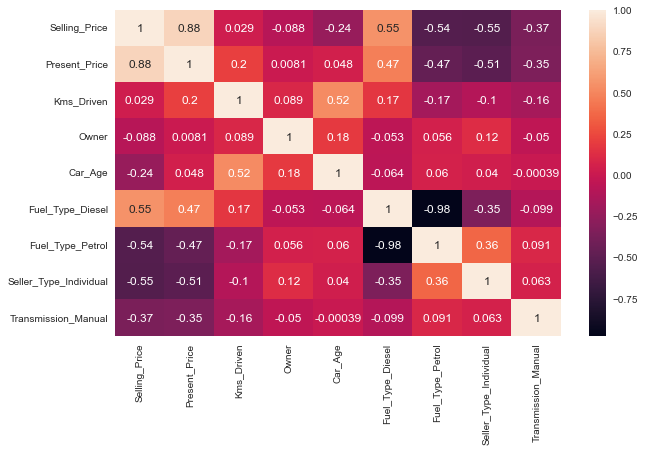

In [262]:
sns.heatmap(df.corr(), annot = True)

In [ ]:
sns.pairplot(df);

### Features and target variable

In [ ]:
X = df.drop("Selling_Price", axis =1)
y = df["Selling_Price"]

### Splitting data into training and testing

In [263]:
from sklearn.model_selection import train_test_split

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

##  Model Building (Linear Regression)

In [265]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression(normalize=True)

In [266]:
lm.fit(X_train, y_train)

LinearRegression(normalize=True)

In [267]:
y_pred = lm.predict(X_test)

In [268]:
X_test

,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
176,1.05,30000,0,11,0,1,1,1
253,9.90,48000,0,8,1,0,0,1
12,9.94,15000,0,7,0,1,0,0
16,10.79,41678,0,7,1,0,0,1
193,0.65,24000,1,9,0,1,1,1
...,...,...,...,...,...,...,...,...
270,10.00,69341,0,11,0,1,0,1
170,0.83,5500,0,10,0,1,1,1
18,5.09,35500,0,7,0,0,0,1
233,5.70,53000,0,9,1,0,0,1


In [269]:
y_pred

array([-0.79181265,  7.7185062 ,  8.16706738,  8.57933363,  0.7281611 ,
        6.75929346,  7.04774896,  8.00196692,  0.80620691,  6.82682886,
        5.26698019,  0.22137646, -3.81848817,  3.23104093, 11.14909998,
        4.23117966,  6.44408989,  1.40073861,  2.93895396,  8.11299153,
        4.28006019,  3.01102497,  5.99358511,  9.02582548,  0.02216636,
        5.67336253,  0.86744054,  4.35558598,  5.15083433,  4.47485336,
        2.64803955, 10.32674461,  0.58681613,  8.14125204,  4.34968137,
       -0.78427831,  2.92366686, -2.90118867,  6.72464063, -0.31507604,
        1.96067941,  4.38231906,  8.83514409, 10.47906207,  0.95717115,
        4.89960535, -3.44975995,  7.69290117,  6.2738112 ,  9.48552814,
        6.46737106,  1.45020051,  7.15189698, -2.34735539,  5.15139505,
        5.62085586,  0.90321237,  2.39834243,  7.32678135,  7.67901246,
       -2.40634253,  9.41065715,  1.79512014,  7.77506683,  7.75287099,
        6.93985684, 11.31961372,  0.45939053,  5.83957899,  6.95

In [270]:
lm.coef_

array([ 4.28499978e-01, -4.31326419e-06,  7.61106184e-01, -4.52193988e-01,
        2.47774639e+00,  3.01403660e-01, -1.26280812e+00, -2.01323220e+00])

In [271]:
lm.intercept_

6.836430819800323

In [272]:
sum(X_test.loc[176] * lm.coef_) + lm.intercept_

-0.7918126512465102

In [273]:
coeff_df=pd.DataFrame(lm.coef_, X.columns, columns=["Coefficient"])
coeff_df

,Coefficient
Present_Price,0.428500
Kms_Driven,-0.000004
Owner,0.761106
Car_Age,-0.452194
Fuel_Type_Diesel,2.477746
Fuel_Type_Petrol,0.301404
Seller_Type_Individual,-1.262808
Transmission_Manual,-2.013232


# Interpret the model

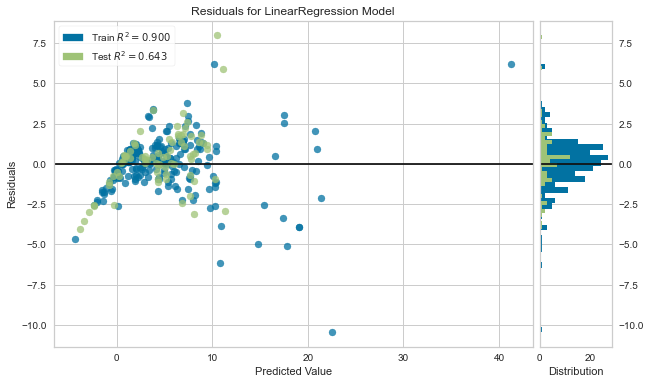

In [274]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
lm = LinearRegression()
visualizer = ResidualsPlot(lm)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();        # Finalize and render the figure

In [ ]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
lm = LinearRegression()
visualizer = PredictionError(lm)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show(); 

# Model Evaluation

In [275]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [276]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [277]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.6429234009325757
MAE 		: 1.3578429218286503
MSE 		: 3.6560208229990763
RMSE 		: 1.9120723895812826


In [278]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Residual":y_test-y_pred}

In [279]:
comparing = pd.DataFrame(my_dict)
comparing

,Actual,Pred,Residual
176,0.35,-0.791813,1.141813
253,7.20,7.718506,-0.518506
12,7.50,8.167067,-0.667067
16,7.25,8.579334,-1.329334
193,0.20,0.728161,-0.528161
...,...,...,...
270,4.10,4.136382,-0.036382
170,0.40,-0.328214,0.728214
18,3.25,3.685785,-0.435785
233,3.90,5.445046,-1.545046


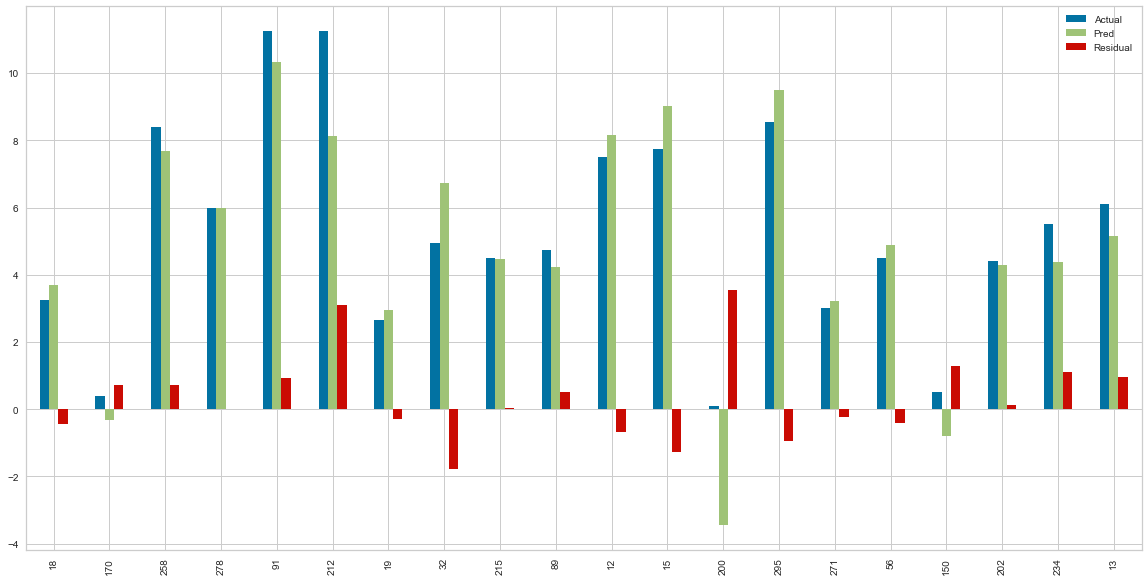

In [280]:
comparing.sample(20).plot(kind ="bar", figsize=(20,10))
plt.show()

# Regularization

# Ridge

In [281]:
from sklearn.linear_model import Ridge,RidgeCV
from sklearn.preprocessing import MinMaxScaler

In [282]:
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [283]:
X_train

array([[0.11345904, 0.08508509, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.01246207, 0.05105105, 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.00530993, 0.08308308, 0.        , ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.14542696, 0.11111111, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.38621586, 0.09309309, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.10901604, 0.1011011 , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [284]:
ridge_model = Ridge(random_state=101)

In [285]:
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

In [286]:
eval_metric(y_test,y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.5263505490918552
MAE 		: 1.6984776773902455
MSE 		: 4.84958202202233
RMSE 		: 2.2021766554984477


In [287]:
ridge_model.alpha

1.0

In [288]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [289]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 10, scoring= "neg_root_mean_squared_error")

In [290]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [ ]:
ridge_cv_model.alpha_

In [ ]:
ridge_cv_model.best_score_

In [ ]:
from yellowbrick.regressor import ManualAlphaSelection
# Create a list of alphas to cross-validate against
# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Ridge(),
    alphas=alpha_space,
    cv=10
)
visualizer.fit(X_train, y_train)
visualizer.show()

In [291]:
y_pred = ridge_cv_model.predict(X_test)

In [292]:
y_pred

array([-0.73454507,  8.08509294,  8.42950508,  8.8689781 ,  0.61943144,
        7.21280266,  7.46652083,  8.328581  ,  0.79551645,  6.63533051,
        5.29195376,  0.21391985, -3.59381659,  3.19422419, 10.76764158,
        4.27032475,  6.990492  ,  1.35923158,  2.99348966,  7.69598913,
        4.35747655,  3.21830097,  5.88098307,  9.2938223 ,  0.04302952,
        5.59724112,  0.86294605,  4.3790351 ,  5.10739596,  4.39899558,
        2.73657476, 10.32569291,  0.58237592,  7.72249931,  4.3801552 ,
       -0.72001928,  3.02477644, -2.72165136,  7.23302382, -0.10104265,
        1.88949937,  4.45340197,  8.18858886,  9.32847697,  0.93713066,
        4.88637676, -3.24791281,  7.29591123,  6.83442205,  9.64246856,
        7.00966765,  1.36433133,  7.58587305, -2.20300604,  5.10792196,
        5.47043057,  0.89616938,  2.86062638,  7.7918905 ,  7.28288273,
       -2.25710787,  9.53593027,  1.74518143,  8.17678557,  8.11566458,
        7.28426964, 10.46062132,  0.47083328,  6.33903793,  6.39

In [293]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.6270494888207612
MAE 		: 1.465241821038682
MSE 		: 3.818549964854974
RMSE 		: 1.9541110420994439


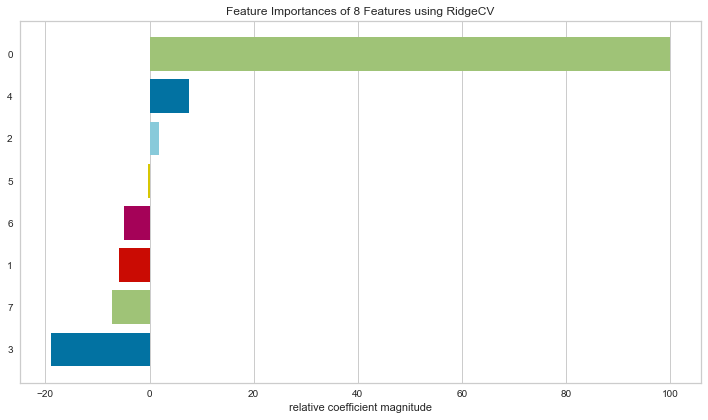

<AxesSubplot:title={'center':'Feature Importances of 8 Features using RidgeCV'}, xlabel='relative coefficient magnitude'>

In [294]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(ridge_cv_model, labels=pd.DataFrame(X_train).columns)
viz.fit(X_train, y_train)
viz.show()

# Lasso

In [295]:
from sklearn.linear_model import Lasso, LassoCV

In [296]:
lasso_model = Lasso(alpha=1, random_state=101)
lasso_model.fit(X_train, y_train)

Lasso(alpha=1, random_state=101)

In [297]:
y_pred = lasso_model.predict(X_test)

In [298]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.2722052675455232
MAE 		: 2.234646131196667
MSE 		: 7.451714012264865
RMSE 		: 2.729782777487041


In [299]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10, random_state=101)

In [300]:
lasso_cv_model.fit(X_train, y_train)
y_pred = lasso_cv_model.predict(X_test)

In [301]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.6817786431211189
MAE 		: 1.3604633522840448
MSE 		: 3.258191407980024
RMSE 		: 1.8050460958047647


In [302]:
lasso_cv_model.alpha_

0.03

In [303]:
lasso_cv_model.mse_path_[-1].mean()

3.990183639761354

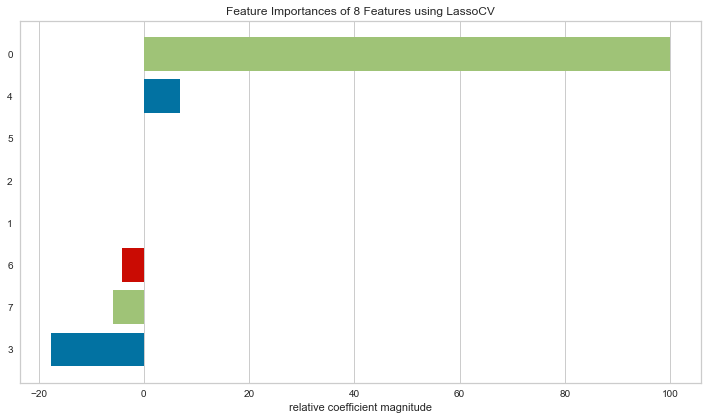

<AxesSubplot:title={'center':'Feature Importances of 8 Features using LassoCV'}, xlabel='relative coefficient magnitude'>

In [304]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(lasso_cv_model, labels=pd.DataFrame(X_train).columns)
viz.fit(X_train, y_train)
viz.show()

## Elastic-Net 

In [305]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [306]:
elastic_model = ElasticNet(random_state=101)
elastic_model.fit(X_train, y_train)

ElasticNet(random_state=101)

In [307]:
y_pred = elastic_model.predict(X_test)

In [308]:
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.2438536637182933
MAE 		: 2.2609637945951926
MSE 		: 7.741999217815959
RMSE 		: 2.7824448274522817


# Final Model

In [243]:
final_model = Lasso(alpha=0.01) #lasso_cv_model

In [244]:
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.6598744922457054
MAE 		: 1.3624780588874552
MSE 		: 3.4824627041662635
RMSE 		: 1.8661357678813895
